In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# 한글폰트 출력 가능 코드
from matplotlib import rc
# 그래프에서 한글 깨짐 방지
import platform
if platform.system() == "Darwin":          # MAC인 경우
    plt.rc('font', family ="AppleGothic")
else:
    plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False
        

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data=pd.read_csv("../csv/crime.csv",encoding='ISO-8859-1')
data = data.drop(columns={'Unnamed: 0','Unnamed: 1'}).transpose()
data=data.dropna(axis=1)
data.columns = ['전체형법범죄', '살인', '강도', '성폭력', '폭행', '절도']
data.head(1)

,전체형법범죄,살인,강도,성폭력,폭행,절도
1976,723.0,1.6,3.8,8.6,34.1,265.7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1976 to 2017
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   전체형법범죄  42 non-null     object
 1   살인      42 non-null     object
 2   강도      42 non-null     object
 3   성폭력     42 non-null     object
 4   폭행      42 non-null     object
 5   절도      42 non-null     object
dtypes: object(6)
memory usage: 2.3+ KB


In [ ]:
# 데이터가 object이므로 선형회귀를 하기에 적합하지 않음
# 따라서 데이터의 타입을 변경해줘야 함 
# 타입 변경에 앞서 object에서 string으로 변환 후 comma (,)를 제거함

In [ ]:
# 전체 형법 범죄에 있는 ,를 제거함
# 전체 데이터 타임을 float형 태로 바꿔줌
# 선형회귀를 하기 위해서

In [ ]:
data['전체형법범죄']=data['전체형법범죄'].astype('string')
data['전체형법범죄']=data['전체형법범죄'].apply(lambda x : x.replace(',',''))
data=data.astype('float')
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42 entries, 1976 to 2017
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   전체형법범죄  42 non-null     float64
 1   살인      42 non-null     float64
 2   강도      42 non-null     float64
 3   성폭력     42 non-null     float64
 4   폭행      42 non-null     float64
 5   절도      42 non-null     float64
dtypes: float64(6)
memory usage: 2.3+ KB


# 단순회귀분석

## 1. Statsmodel 라이브러리

In [ ]:
# 상관분석에 앞서 먼저 시각화를 이용하여 상관성을 육안으로 확인해본다.
sub = data[['전체형법범죄', '살인']]


sub2 = data[{'전체형법범죄', '살인'}]
sub2

C:\Users\dgh06\AppData\Local\Temp\ipykernel_8904\2317883033.py:5: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  sub2 = data[{'전체형법범죄', '살인'}]


,살인,전체형법범죄
1976,1.6,723.0
1977,1.4,731.0
1978,1.3,735.0
1979,1.2,720.0
1980,1.4,800.0
1981,1.6,935.0
1982,1.4,758.0
1983,1.3,716.0
1984,1.4,700.0
1985,1.5,666.0


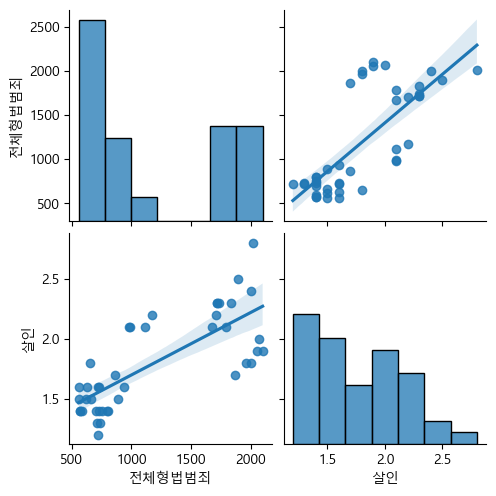

In [ ]:
# 각 데이터의 히스토그램과 산점도를 도출(산점도에는 회귀선까지 구현)
sns.pairplot(sub, kind='reg')
plt.show()

In [ ]:
#!pip install Statsmodels
# 필요한 라이브러리
import statsmodels.api as sm


In [ ]:
# target은 종속변수, feature는 독립변수와 같다.
target = data['전체형법범죄']
feature = data['살인']

# 상수항을 더해줘서 회귀식을 더 잘 적합할 수 있도록 만들어 준다.
feature_add = sm.add_constant(feature, has_constant='add')
# 상수항 더한 것 확인
feature_add

,const,살인
1976,1.0,1.6
1977,1.0,1.4
1978,1.0,1.3
1979,1.0,1.2
1980,1.0,1.4
1981,1.0,1.6
1982,1.0,1.4
1983,1.0,1.3
1984,1.0,1.4
1985,1.0,1.5


In [ ]:
# sm OLS 적합
model = sm.OLS(target, feature_add)
fitted_model = model.fit()
# summary 함수통해 결과출력
print(fitted_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 전체형법범죄   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     53.94
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           6.24e-09
Time:                        15:15:21   Log-Likelihood:                -307.98
No. Observations:                  42   AIC:                             620.0
Df Residuals:                      40   BIC:                             623.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -788.8905    275.455     -2.864      0.0